<a href="https://colab.research.google.com/github/Sadhu2005/AI4SEE-PRIVATE-LIMITED/blob/main/anomaly_regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
samp_test_data = pd.read_csv("/content/smap_test[1].csv")

In [12]:
print(samp_test_data)

               0    1    2    3    4    5    6    7    8    9  ...   15   16  \
0       1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1       1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2       1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3       1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4       1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
427612  0.992570  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
427613  0.992570  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
427614  0.992570  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
427615  0.995638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
427616  0.995638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

         17   18   19   20   21   22   

In [35]:
def plot_data(data):
    plt.figure(figsize=(10, 6),)  # Adjust the figure size as needed
    plt.plot(data)  # Plot all columns
    plt.xlabel('Index')  # Label for x-axis
    plt.ylabel('Values')  # Label for y-axis
    plt.title('')  # Title of the plot
    plt.legend(data.columns)  # Add legend with column names
    plt.grid(True)  # Add grid lines
    plt.show()  # Display the plot


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


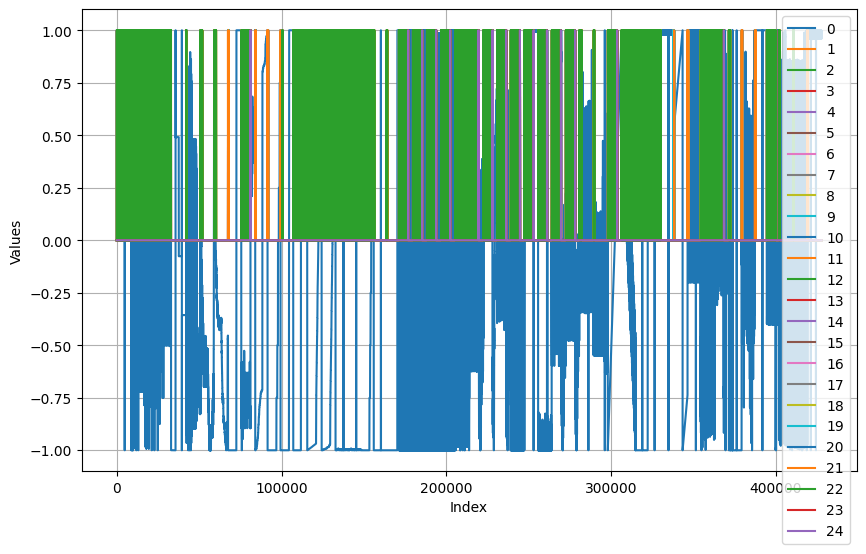

In [36]:
plot_data(samp_test_data)

In [23]:
smap_test_label_data= pd.read_csv('/content/smap_test_label[1].csv')

In [24]:
print(smap_test_label_data)

        0
0       0
1       0
2       0
3       0
4       0
...    ..
427612  0
427613  0
427614  0
427615  0
427616  0

[427617 rows x 1 columns]


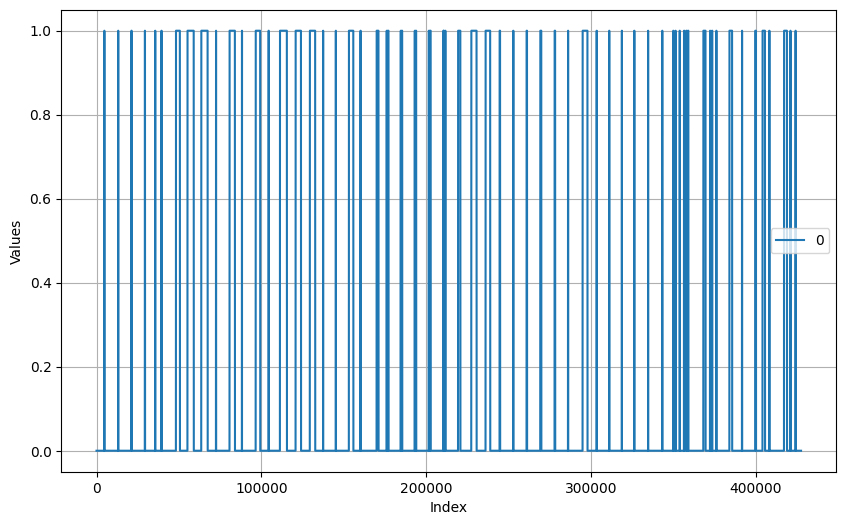

In [25]:
plot_data(smap_test_label_data,'smap_test_label_data')

In [26]:
def perform_eda(data):
    # Summary statistics
    print("Summary statistics:")
    print(data.describe())

    # Visualize distributions of features
    data.hist(figsize=(15, 10))
    plt.suptitle("Distribution of Features")
    plt.show()

    # Visualize correlation matrix
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


In [28]:
import seaborn as sns


Summary statistics:
                   0              1              2              3  \
count  427617.000000  427617.000000  427617.000000  427617.000000   
mean       -0.179944       0.019174       0.003442       0.015392   
std         0.775223       0.137135       0.058570       0.123107   
min        -1.000000       0.000000       0.000000       0.000000   
25%        -0.997772       0.000000       0.000000       0.000000   
50%        -0.358844       0.000000       0.000000       0.000000   
75%         0.666807       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                   4              5              6              7  \
count  427617.000000  427617.000000  427617.000000  427617.000000   
mean        0.000313       0.090146       0.068957       0.000664   
std         0.017699       0.286391       0.253381       0.025762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0

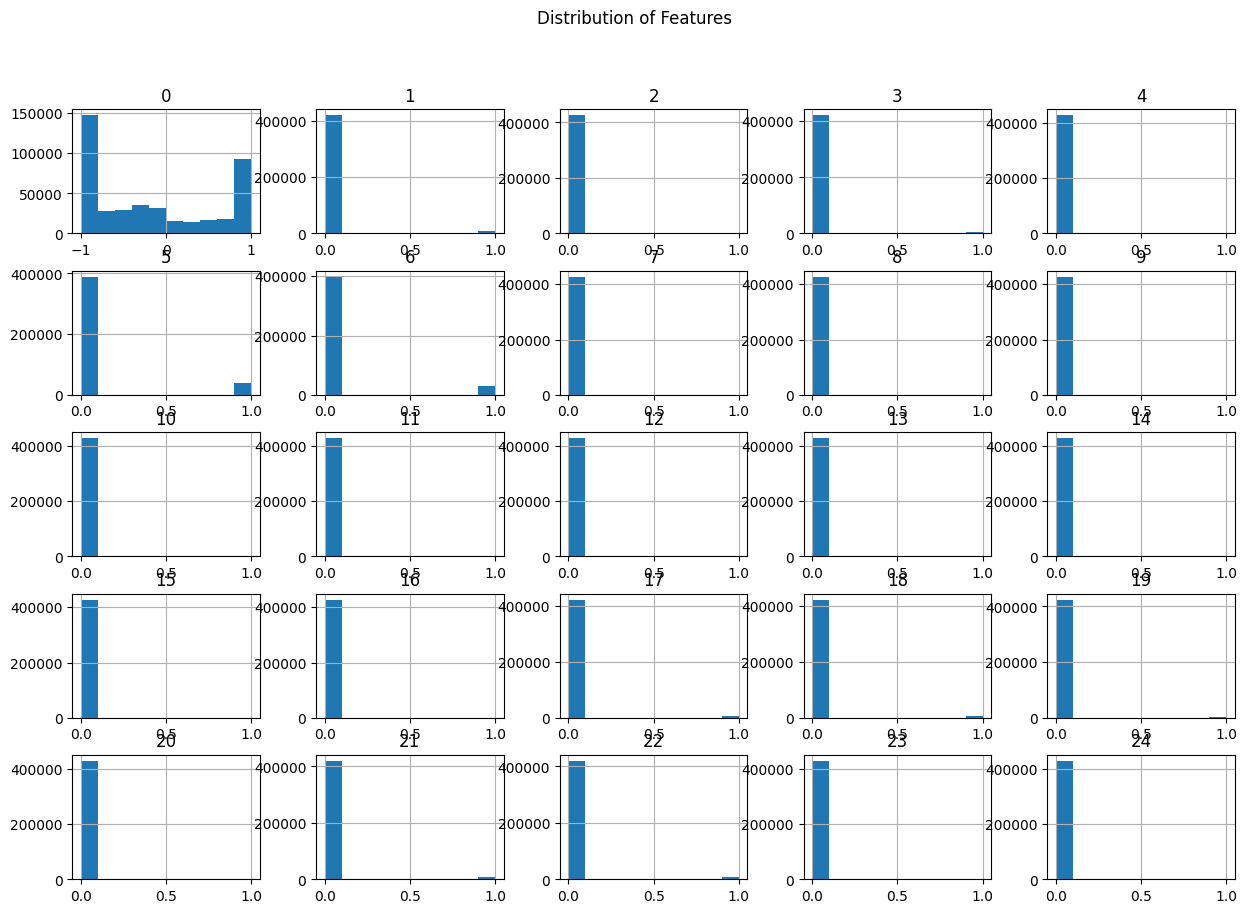

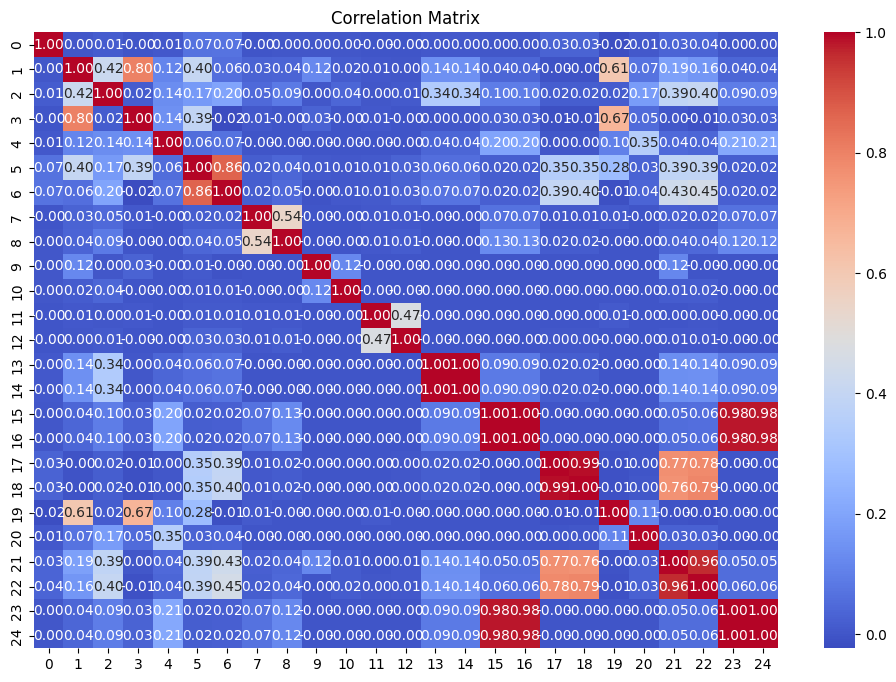

In [29]:
perform_eda(samp_test_data)

In [30]:
# Calculate correlation between features and anomaly labels
correlation_with_labels = samp_test_data.corrwith(smap_test_label_data)

In [31]:
# Sort features based on correlation with labels
correlation_with_labels = correlation_with_labels.abs().sort_values(ascending=False)

In [32]:
# Print the features sorted by correlation with labels
print("Features sorted by correlation with labels:")
print(correlation_with_labels)


Features sorted by correlation with labels:
0     0.042817
1          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
2          NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
dtype: float64


In [33]:
# Plot features with highest correlation with labels
num_top_features = 5  # Change the number of top features as needed
top_features = correlation_with_labels.head(num_top_features)
top_features_data = samp_test_data[top_features.index]


<Figure size 1200x600 with 0 Axes>

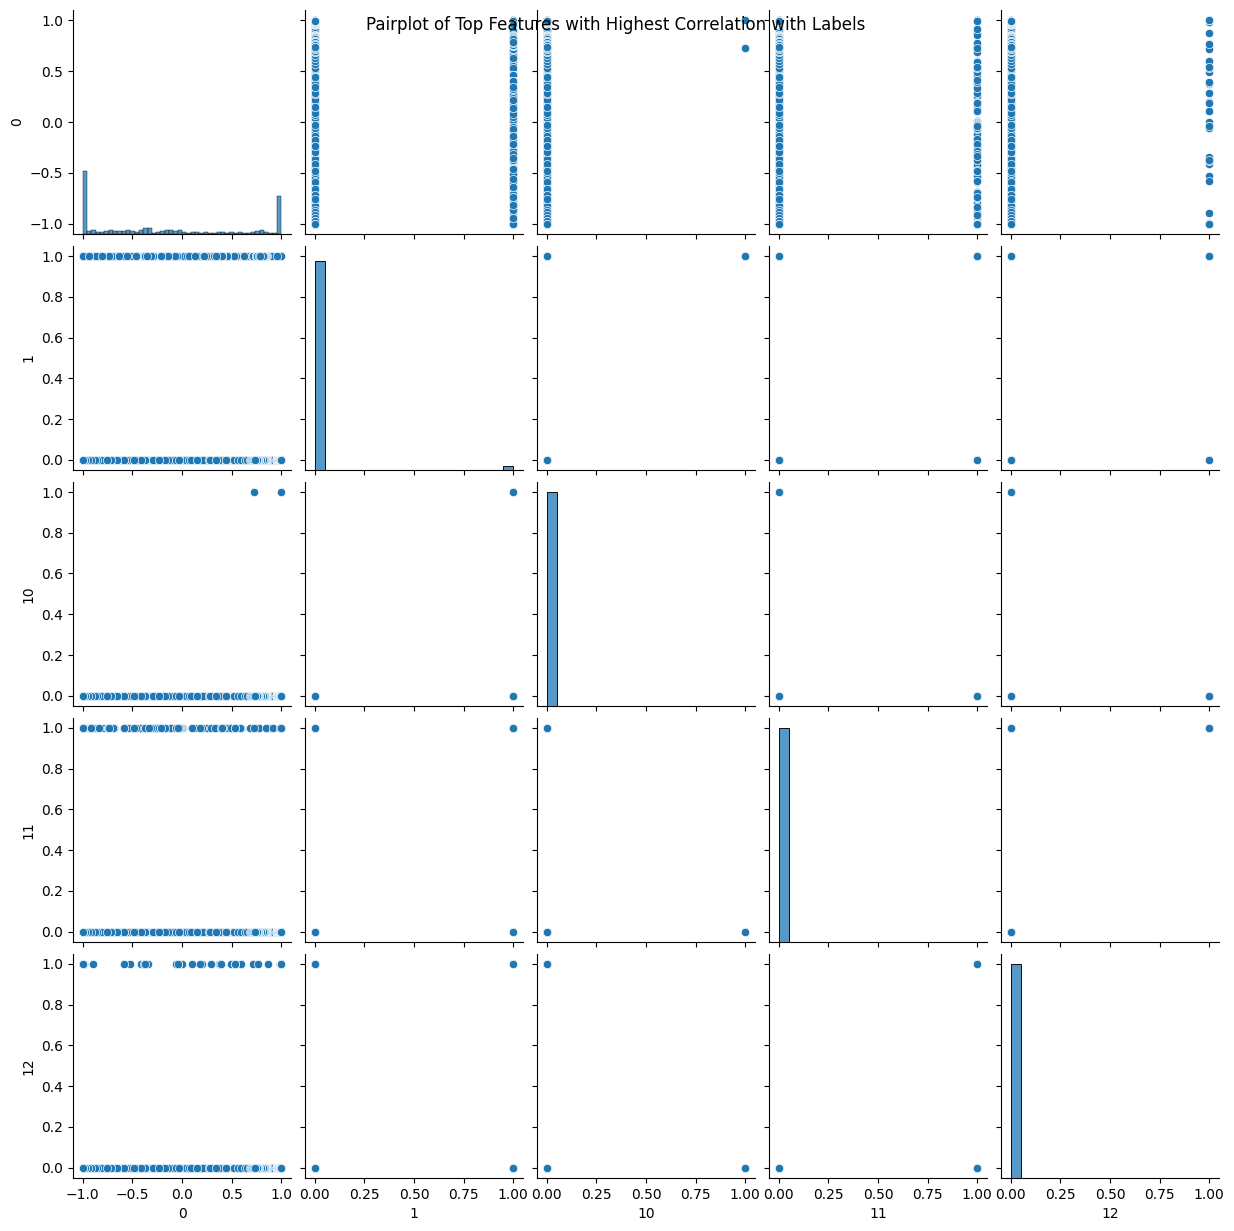

In [34]:
plt.figure(figsize=(12, 6))
sns.pairplot(top_features_data)
plt.suptitle("Pairplot of Top Features with Highest Correlation with Labels")
plt.show()

In [37]:
msl_test_data = pd.read_csv('/content/msl_test[1].csv')

In [38]:
msl_test_label_data = pd.read_csv('/content/msl_test_label[2].csv')

In [39]:
print(msl_test_data)

              0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  \
0     -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
1     -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
2     -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
3     -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4     -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
...         ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
73724  0.499149  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
73725  0.501221  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
73726  0.501221  0  0  0  0  1  0  0  0  0  ...   0   0   0   0   0   0   0   
73727  0.501221  0  0  0  0  1  0  0  0  0  ...   0   0   0   0   0   0   0   
73728 -0.954212  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   

       52  53  54  
0       0   0   0  
1       0  

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


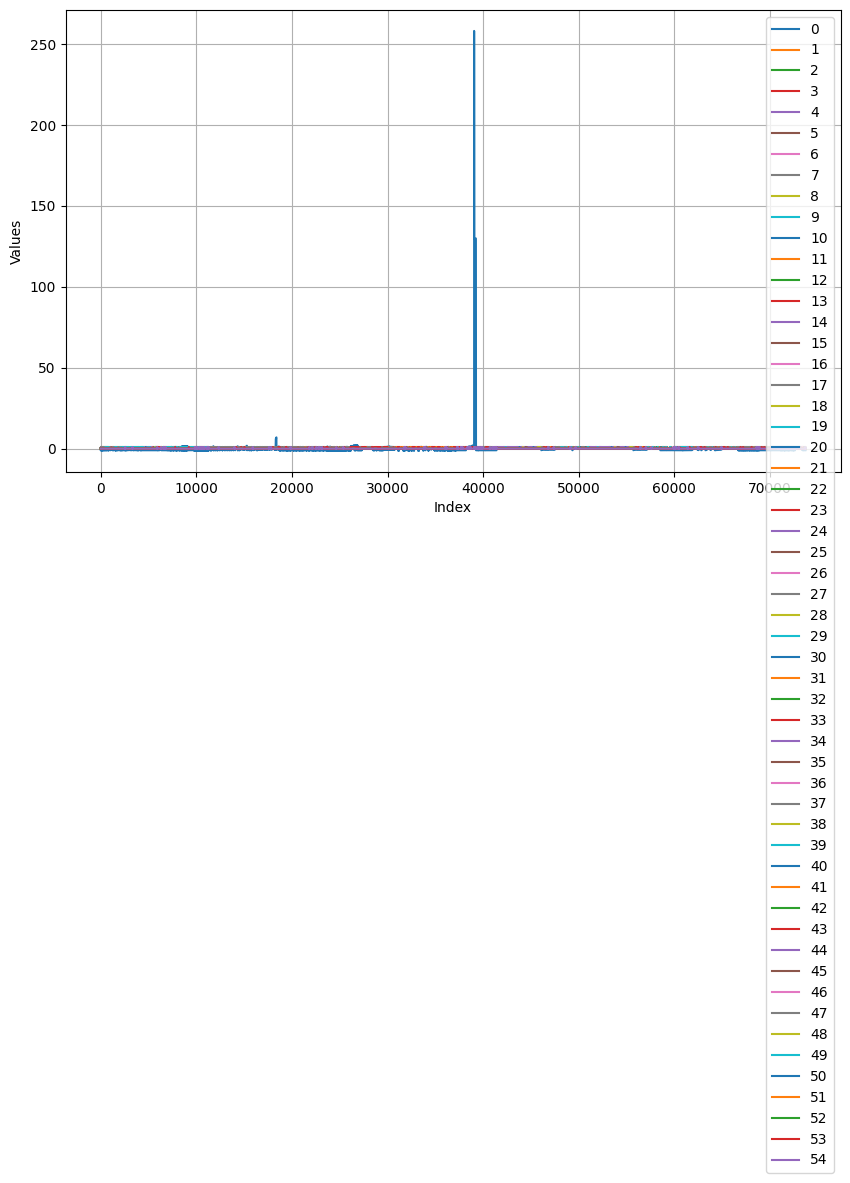

In [40]:
plot_data(msl_test_data)

In [41]:
print(msl_test_label_data)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
73724  0
73725  0
73726  0
73727  0
73728  0

[73729 rows x 1 columns]


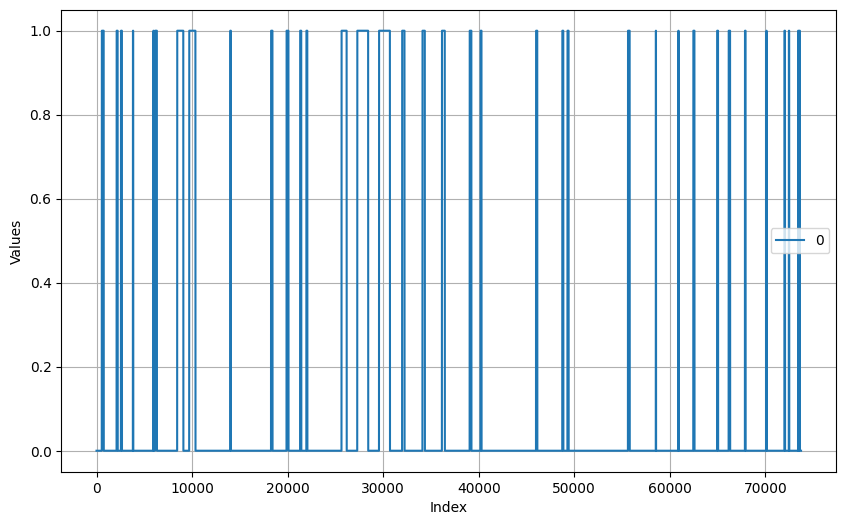

In [42]:
plot_data(msl_test_label_data)

Summary statistics:
                  0        1        2        3        4             5  \
count  73729.000000  73729.0  73729.0  73729.0  73729.0  73729.000000   
mean       0.238579      0.0      0.0      0.0      0.0      0.077758   
std        6.626549      0.0      0.0      0.0      0.0      0.267792   
min       -1.424197      0.0      0.0      0.0      0.0      0.000000   
25%       -0.986429      0.0      0.0      0.0      0.0      0.000000   
50%       -0.310727      0.0      0.0      0.0      0.0      0.000000   
75%        0.918899      0.0      0.0      0.0      0.0      0.000000   
max      258.108108      0.0      0.0      0.0      0.0      1.000000   

                  6             7        8             9  ...            45  \
count  73729.000000  73729.000000  73729.0  73729.000000  ...  73729.000000   
mean       0.000543      0.000258      0.0      0.000095  ...      0.000203   
std        0.023286      0.016051      0.0      0.009743  ...      0.014262   
min   

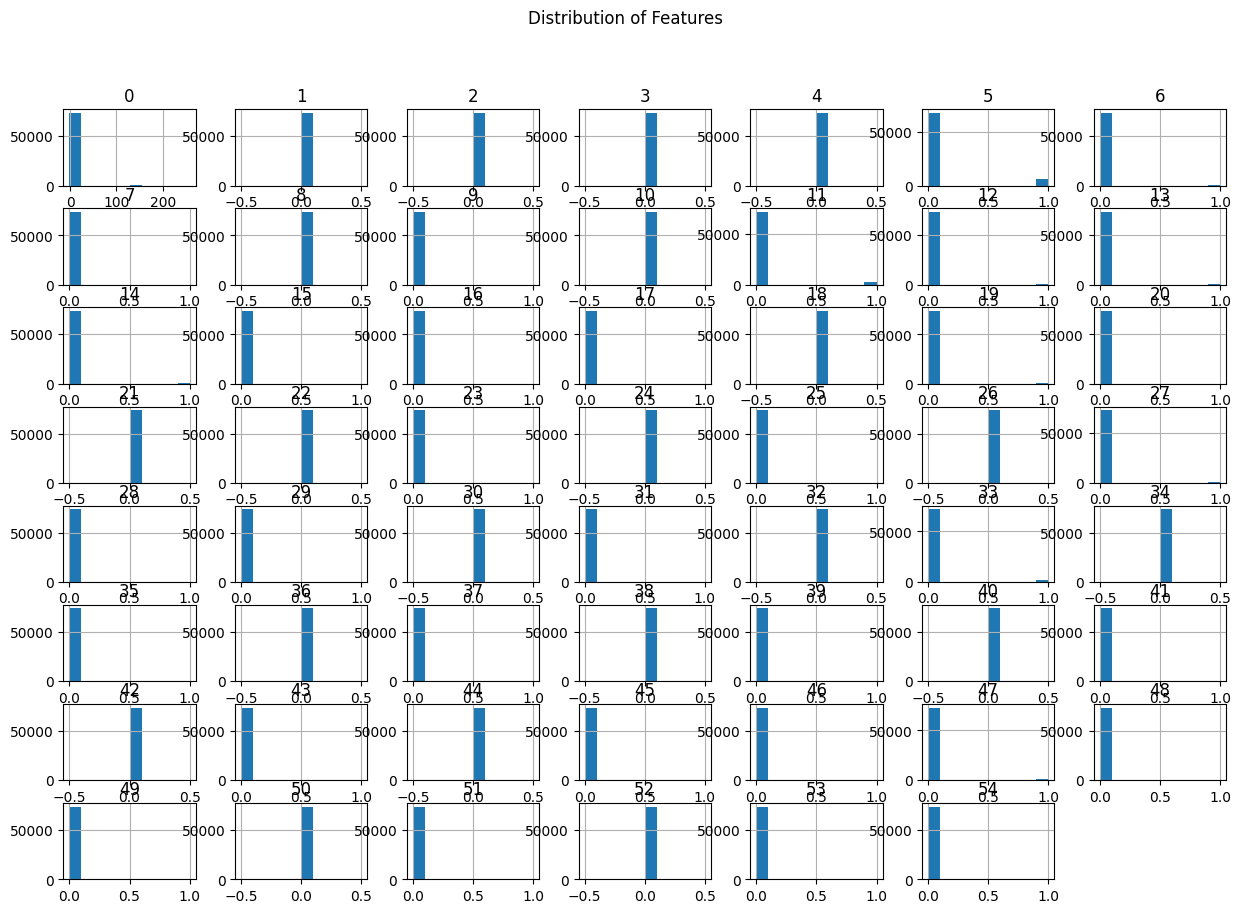

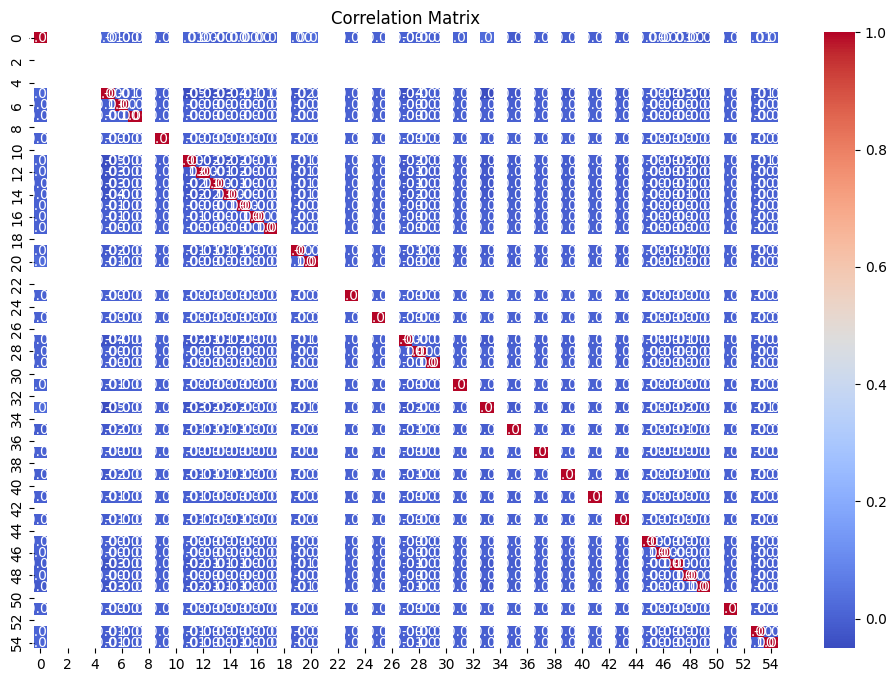

In [43]:
perform_eda(msl_test_data)

In [45]:
def find_top_correlated_features(train_features, train_labels, num_top_features=5):
    # Calculate correlation between features and anomaly labels
    correlation_with_labels = train_features.corrwith(train_labels)

    # Sort features based on correlation with labels
    correlation_with_labels = correlation_with_labels.abs().sort_values(ascending=False)

    # Print the features sorted by correlation with labels
    print("Features sorted by correlation with labels:")
    print(correlation_with_labels)

    # Plot features with highest correlation with labels
    top_features = correlation_with_labels.head(num_top_features)
    top_features_data = train_features[top_features.index]

    plt.figure(figsize=(12, 6))
    sns.pairplot(top_features_data)
    plt.suptitle("Pairplot of Top Features with Highest Correlation with Labels")
    plt.show()



Features sorted by correlation with labels:
0     0.143276
1          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
2          NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
3          NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
4          NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
5          NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
6          NaN
7          NaN
8          NaN
9          NaN
dtype: float64


<Figure size 1200x600 with 0 Axes>

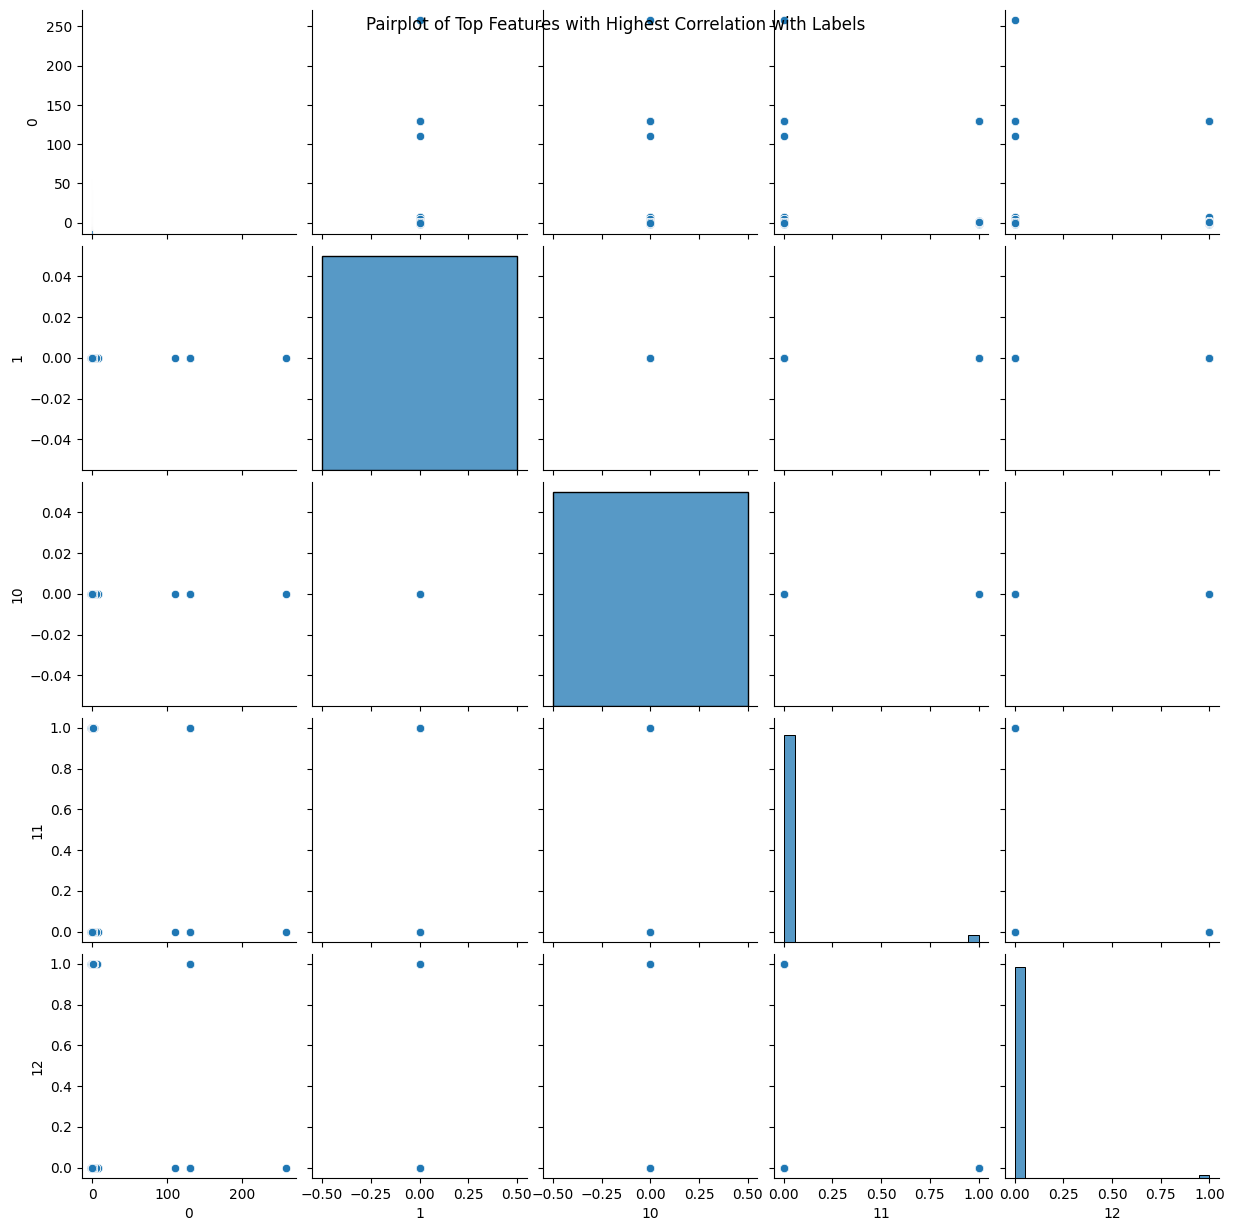

In [46]:
# Call the function
find_top_correlated_features(msl_test_data, msl_test_label_data)

In [47]:
test_data = pd.read_csv('/content/test[2].csv')
test_label_data = pd.read_csv('/content/test_label[1].csv')

              0         1         2         3    4         5         6    7  \
0      0.000000  0.000340  0.000432  0.000000  0.0  0.694290  0.038316  0.0   
1      0.000000  0.000510  0.000576  0.000000  0.0  0.694702  0.038856  0.0   
2      0.000000  0.000510  0.000576  0.000000  0.0  0.694908  0.038856  0.0   
3      0.000000  0.000170  0.000432  0.000000  0.0  0.695114  0.038856  0.0   
4      0.000000  0.000935  0.000720  0.000336  0.0  0.695733  0.039935  0.0   
...         ...       ...       ...       ...  ...       ...       ...  ...   
69996  0.062500  0.047847  0.041333  0.048338  0.0  0.209877  0.266667  0.0   
69997  0.052083  0.031100  0.036000  0.046828  0.0  0.209877  0.250000  0.0   
69998  0.052083  0.021531  0.034667  0.045317  0.0  0.211934  0.266667  0.0   
69999  0.052083  0.039474  0.038667  0.045317  0.0  0.211934  0.266667  0.0   
70000  0.062500  0.061005  0.045333  0.046828  0.0  0.209877  0.250000  0.0   

              8    9  ...   28    29        30     

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


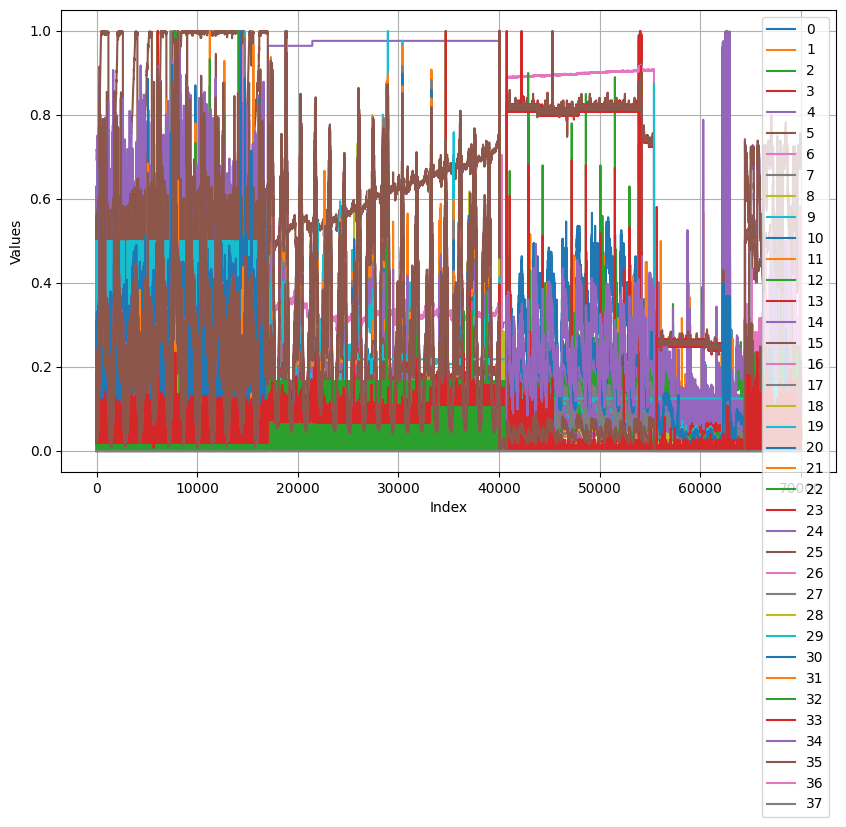

In [48]:
print(test_data)
plot_data(test_data)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
69996  0
69997  0
69998  0
69999  0
70000  0

[70001 rows x 1 columns]


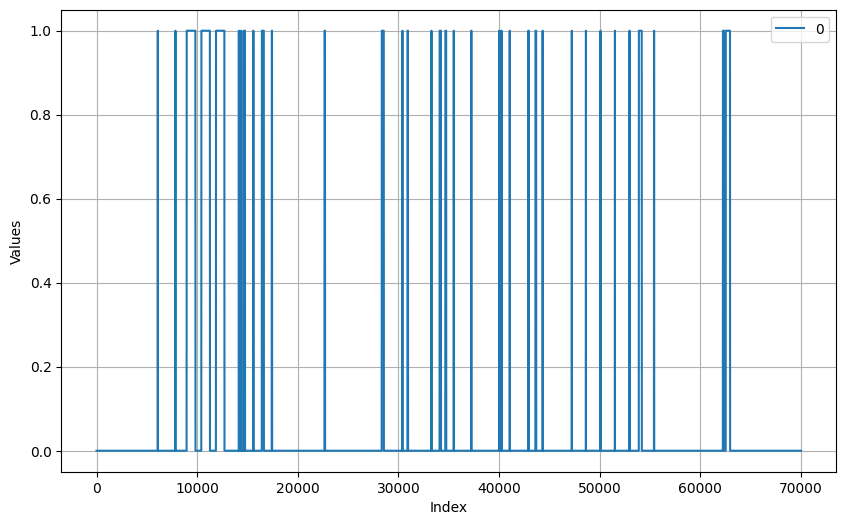

In [49]:
print(test_label_data)
plot_data(test_label_data)

Summary statistics:
                  0             1             2             3             4  \
count  70001.000000  70001.000000  70001.000000  70001.000000  70001.000000   
mean       0.125281      0.025424      0.034415      0.037462      0.322057   
std        0.148530      0.072388      0.088629      0.093520      0.456736   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.010309      0.001495      0.001873      0.002546      0.000000   
50%        0.070707      0.004785      0.005242      0.006364      0.000000   
75%        0.191919      0.020927      0.029270      0.031797      0.976471   
max        1.000000      1.000000      1.000000      1.000000      0.976471   

                  5             6        7             8             9  ...  \
count  70001.000000  70001.000000  70001.0  70001.000000  70001.000000  ...   
mean       0.459721      0.336344      0.0      0.011226      0.000749  ...   
std        0.347015      0.3125

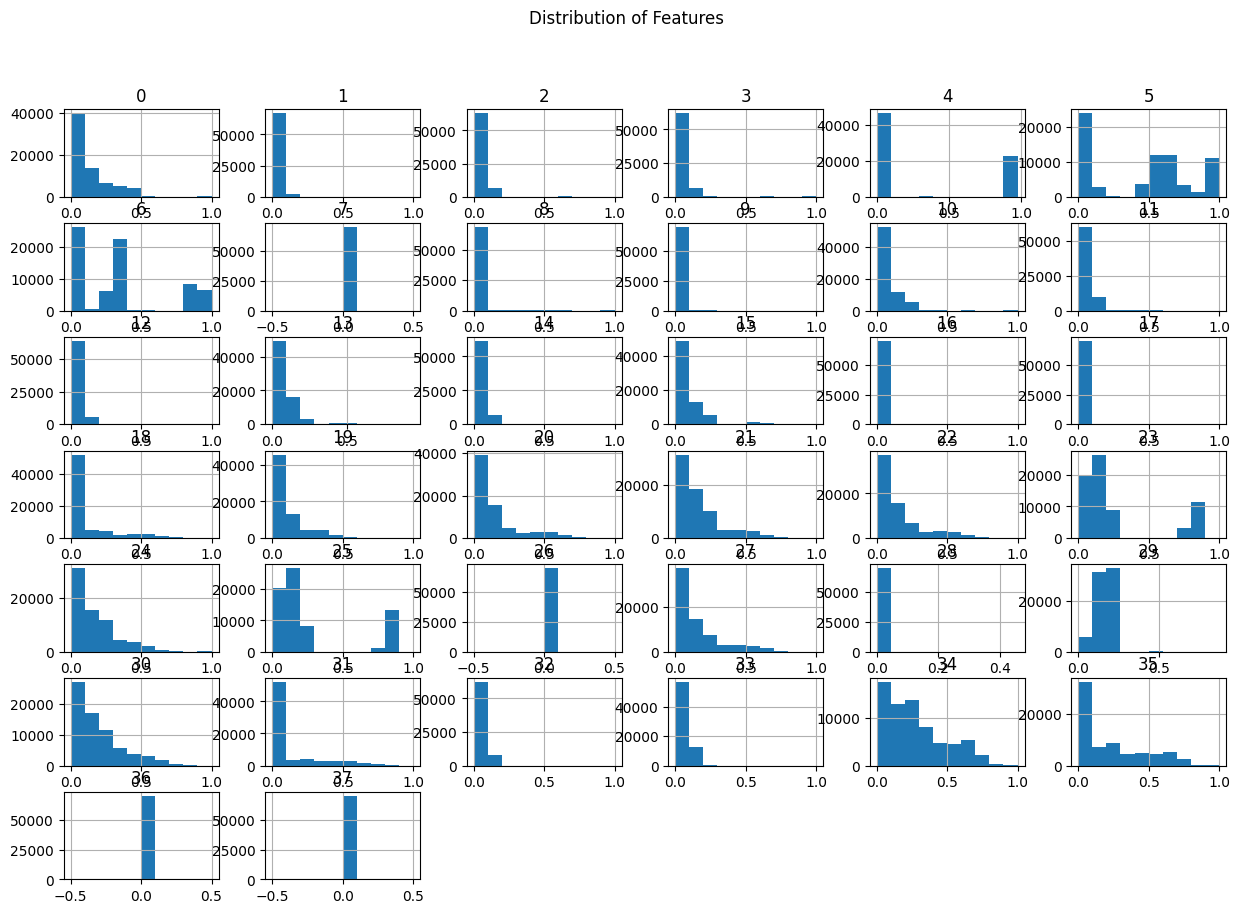

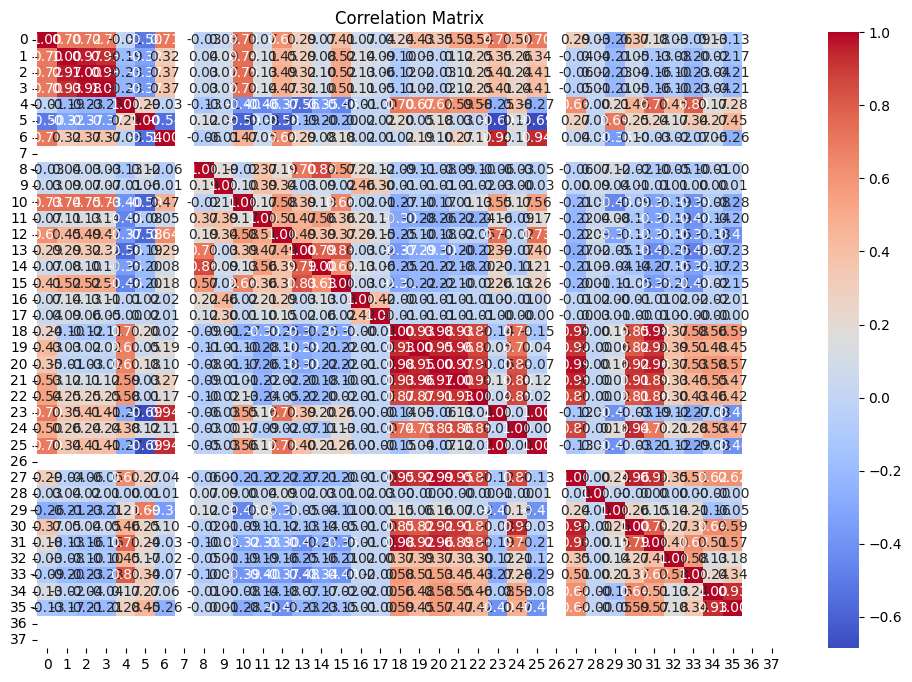

In [50]:
perform_eda(test_data)

Features sorted by correlation with labels:
0     0.092786
1          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
2          NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
3          NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
dtype: float64


<Figure size 1200x600 with 0 Axes>

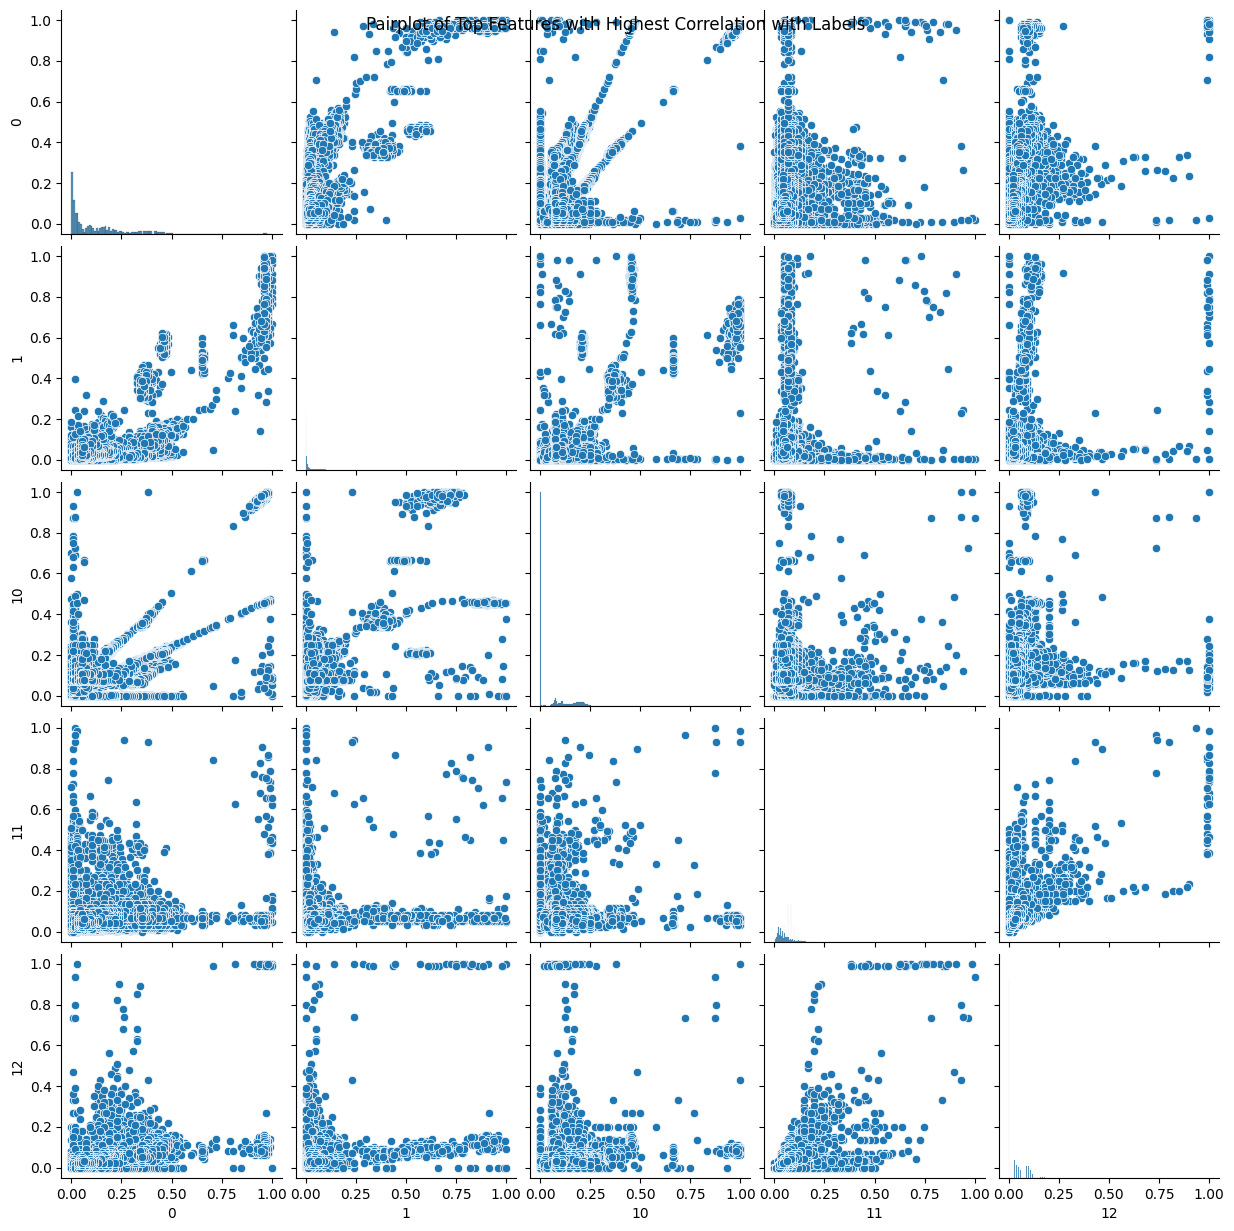

In [51]:
find_top_correlated_features(test_data,test_label_data)

In [53]:
psm_test_data = pd.read_csv('/content/psm_test[2].csv')
psm_test_label_data = pd.read_csv('/content/psm_test_label[1].csv')

       timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0             132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1             132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2             132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3             132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4             132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   
...                ...        ...        ...        ...        ...        ...   
87836         220316.0   0.864548   0.660041   0.590923   0.413322   0.364657   
87837         220317.0   0.864483   0.536428   0.590742   0.413331   0.363695   
87838         220318.0   0.864644   0.636236   0.590451   0.413619   0.348942   
87839         220319.0   0.864553   0.643499   0.590222   0.413689   0.355997   
87840         220320.0   0.864695   0.645337   0.590731   0.413732   0.357280   

       feature_5  feature_6

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


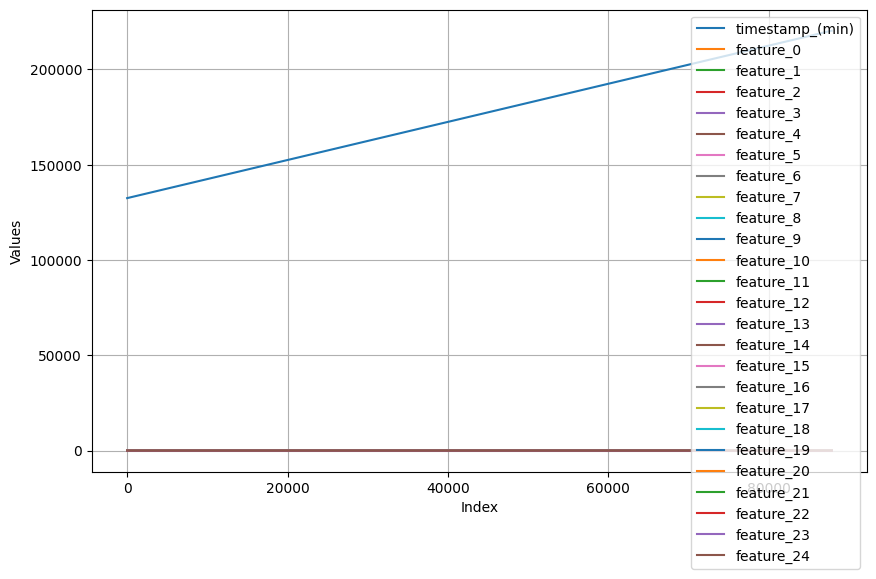

In [54]:
print(psm_test_data)
plot_data(psm_test_data)

       timestamp_(min)  label
0             132480.0      0
1             132481.0      0
2             132482.0      0
3             132483.0      0
4             132484.0      0
...                ...    ...
87836         220316.0      0
87837         220317.0      0
87838         220318.0      0
87839         220319.0      0
87840         220320.0      0

[87841 rows x 2 columns]


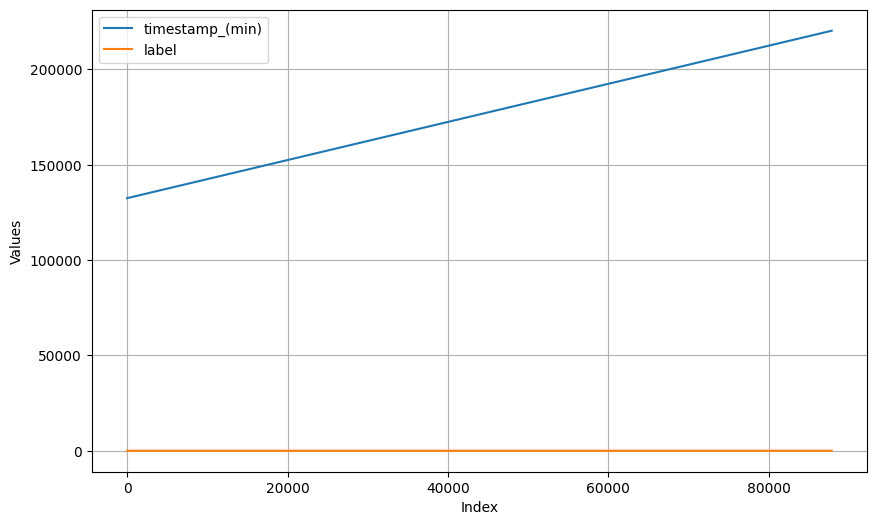

In [55]:
print(psm_test_label_data)
plot_data(psm_test_label_data)

Summary statistics:
       timestamp_(min)     feature_0     feature_1     feature_2  \
count     87841.000000  87841.000000  87841.000000  87841.000000   
mean     176400.000000      0.829105      0.857500      0.622801   
std       25357.656835      0.047640      0.073858      0.031606   
min      132480.000000      0.521701      0.387415      0.453511   
25%      154440.000000      0.795859      0.809958      0.604902   
50%      176400.000000      0.825835      0.867525      0.616689   
75%      198360.000000      0.861815      0.914453      0.636475   
max      220320.000000      0.928893      1.000000      0.720898   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  87841.000000  87841.000000  87841.000000  87841.000000  87841.000000   
mean       0.652205      0.516833      0.482637      0.539184      0.520756   
std        0.171261      0.077901      0.069440      0.054200      0.069604   
min        0.331163      0.073765      0.117442    

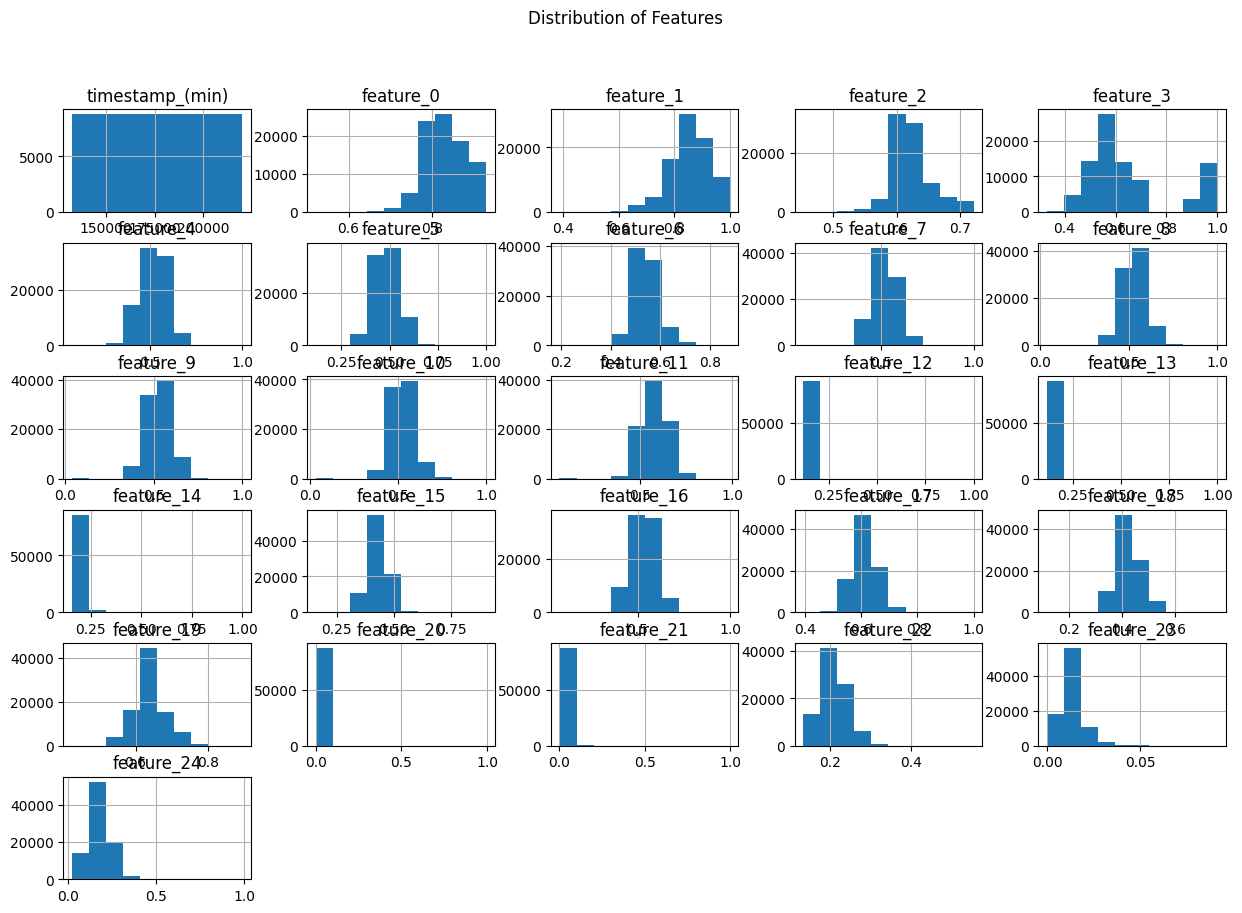

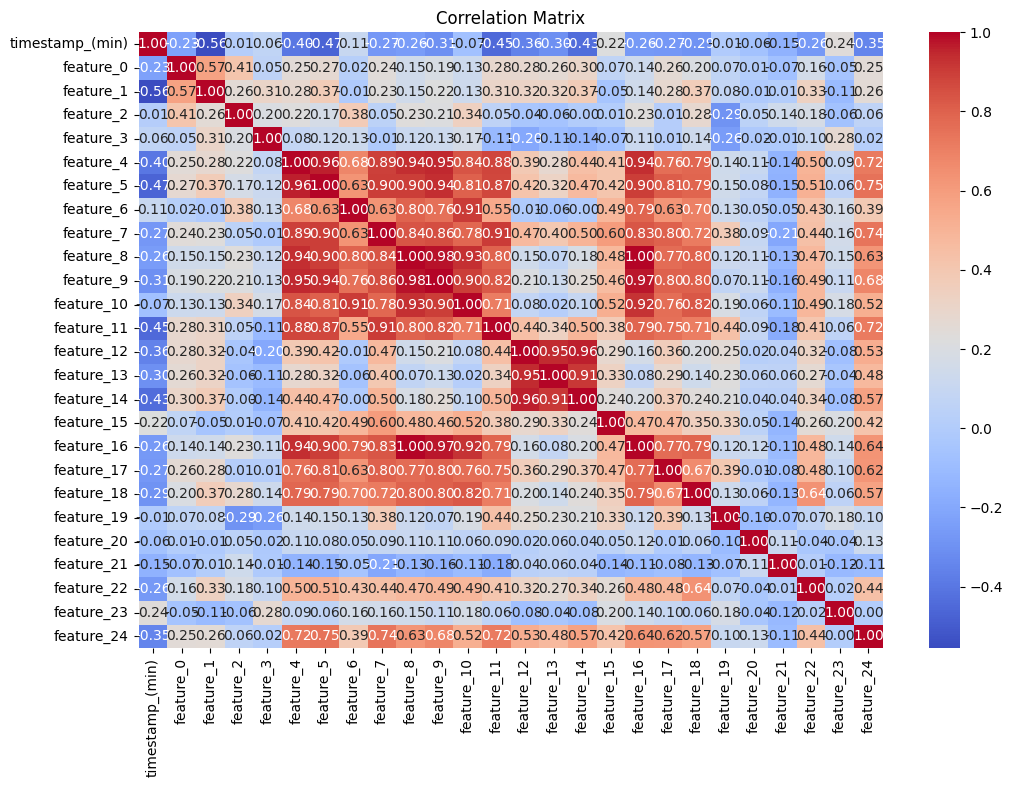

In [56]:
perform_eda(psm_test_data)

Features sorted by correlation with labels:
timestamp_(min)    1.0
feature_0          NaN
feature_1          NaN
feature_10         NaN
feature_11         NaN
feature_12         NaN
feature_13         NaN
feature_14         NaN
feature_15         NaN
feature_16         NaN
feature_17         NaN
feature_18         NaN
feature_19         NaN
feature_2          NaN
feature_20         NaN
feature_21         NaN
feature_22         NaN
feature_23         NaN
feature_24         NaN
feature_3          NaN
feature_4          NaN
feature_5          NaN
feature_6          NaN
feature_7          NaN
feature_8          NaN
feature_9          NaN
label              NaN
dtype: float64


<Figure size 1200x600 with 0 Axes>

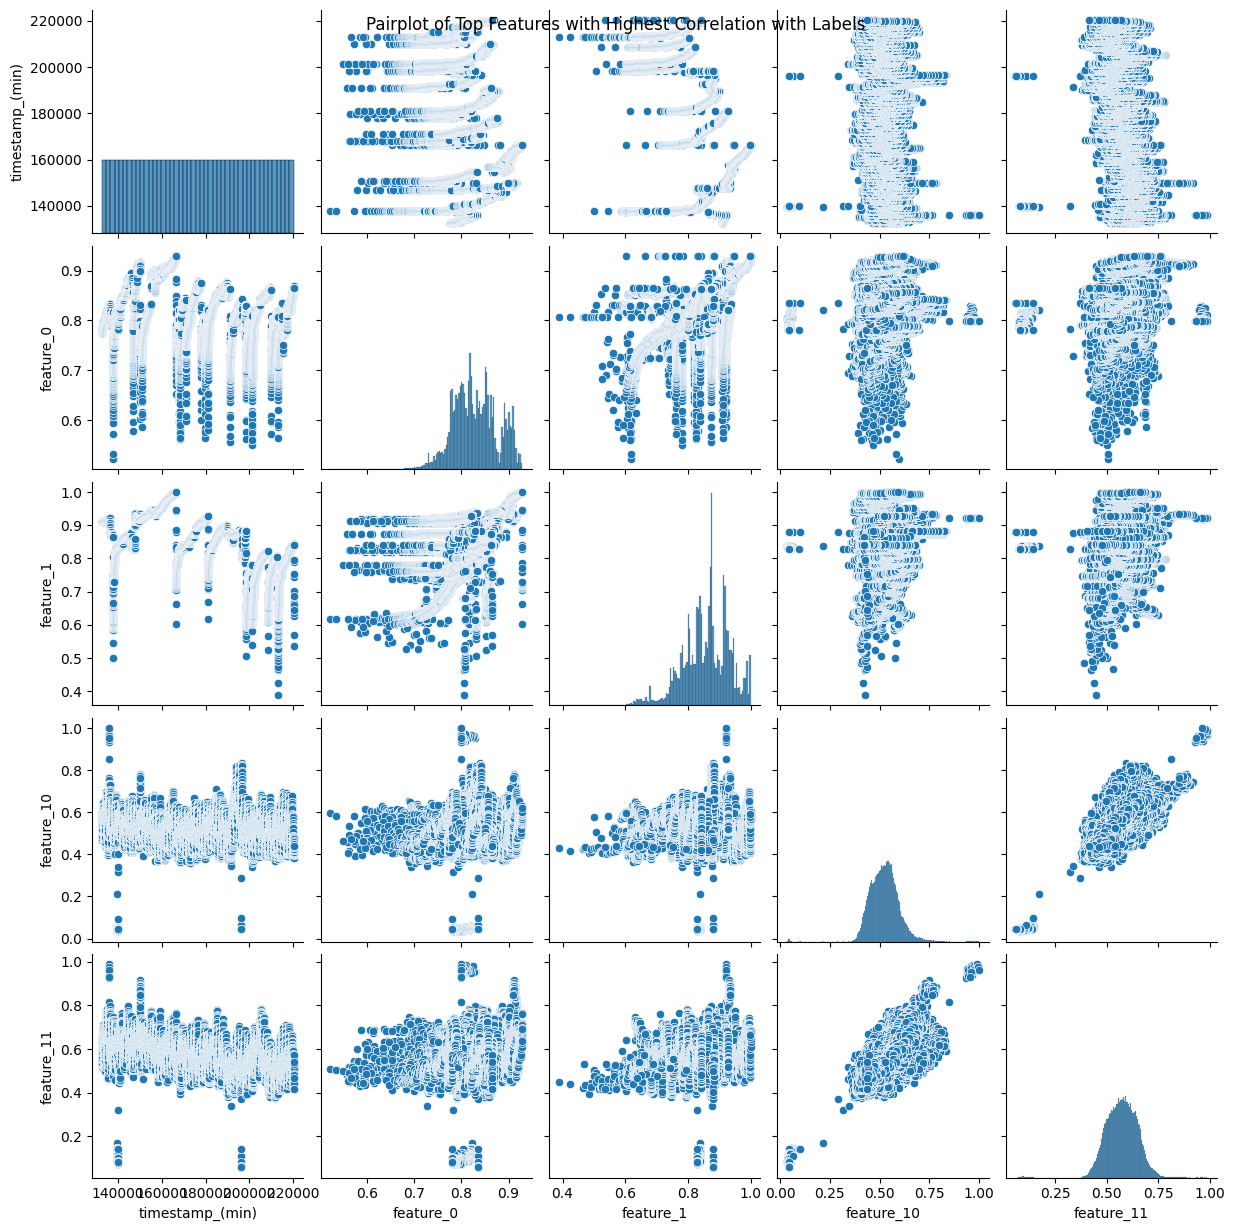

In [57]:
find_top_correlated_features(psm_test_data,psm_test_label_data)